# Exercícios:

1 - Importe o arquivo "dataframe_exercicio_modulo_7.csv" em um dataframe - df - do Pandas.

In [414]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

----

2 - Quais as dimensões do dataframe?

In [415]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


----

3 - Qual o tipo das variáveis?

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   idade             29071 non-null  float64
 1   tempo_educacao    29170 non-null  int64  
 2   estado_civil      29170 non-null  object 
 3   cor               29170 non-null  object 
 4   sexo              29170 non-null  object 
 5   horas_por_semana  29170 non-null  int64  
 6   salario_anual     29170 non-null  object 
 7   nome              0 non-null      float64
 8   dívida            0 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 2.0+ MB


----

4 - Existem variáveis faltantes no dataset? Quais?

**Existem variáveis faltantes no dataset:**
 > - Variável _'nome'_: 100% de dados faltantes
 > - Variável _'dívida'_: 100% de dados faltantes
 > - Variável _'idade'_: 34% de dados faltantes

In [417]:
# quantidade de valores faltantes por variável
df.isnull().sum()

idade                  99
tempo_educacao          0
estado_civil            0
cor                     0
sexo                    0
horas_por_semana        0
salario_anual           0
nome                29170
dívida              29170
dtype: int64

In [418]:
# em percentual
((df.isnull().sum() / df.shape[0]) * 100).round(2)

idade                 0.34
tempo_educacao        0.00
estado_civil          0.00
cor                   0.00
sexo                  0.00
horas_por_semana      0.00
salario_anual         0.00
nome                100.00
dívida              100.00
dtype: float64

----

5 - Exiba todas as categorias das variáveis 'estado_civil', 'cor' e 'sexo'. Você consegue detectar algum problema?

In [419]:
# extrair uma lista com as categorias existentes na variável ESTADO CIVIL
sorted(df.estado_civil.unique())

['Divorced',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed']

In [420]:
# extrair uma lista com as categorias existentes na variável COR
sorted(df.cor.unique())

['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [421]:
# extrair uma lista com as categorias existentes na variável SEXO
sorted(df.sexo.unique())

['?', 'Female', 'Male']

**PROBLEMA DETECTADO**
 - Na variável SEXO, existem campos preenchido com   "**_?_**". 
 - Vou verificar qual o percentual de cada categoria para decidir o que fazer nesse caso.

In [422]:
tbl_freq_sexo = pd.DataFrame(df.sexo.value_counts())
tbl_freq_sexo.rename(columns = {'sexo':'freq_abs_sexo'}, inplace = True)
tbl_freq_sexo['freq_relativa_sexo'] = round(tbl_freq_sexo.freq_abs_sexo / tbl_freq_sexo.freq_abs_sexo.sum(),2)
tbl_freq_sexo

,freq_abs_sexo,freq_relativa_sexo
Male,18181,0.62
Female,9052,0.31
?,1937,0.07


A categoria "**_?_**" representa 7% do conjunto de dados, por isso vou preencher com a Moda das categorias.

In [423]:
# calculando a moda da variável sexo
moda_variavel_sexo = df.sexo.value_counts().idxmax()
moda_variavel_sexo

'Male'

In [424]:
# substituir a categoria '?' pela categoria 'Male'
df.loc[df.sexo=='?','sexo']='Male'

In [425]:
# conferindo se a alteração foi realizada com sucesso
tbl_freq_sexo = pd.DataFrame(df.sexo.value_counts())
tbl_freq_sexo.rename(columns = {'sexo':'freq_abs_sexo'}, inplace = True)
tbl_freq_sexo['freq_relativa_sexo'] = round(tbl_freq_sexo.freq_abs_sexo / tbl_freq_sexo.freq_abs_sexo.sum(),2)
tbl_freq_sexo

,freq_abs_sexo,freq_relativa_sexo
Male,20118,0.69
Female,9052,0.31


----

6 - Faça um tratamento nas variáveis faltantes.

In [426]:
# Deletar as colunas que estão com 100% de dados faltantes (colunas NOME e DÍVIDA)
df.drop(['nome', 'dívida'], axis=1, inplace=True)

In [427]:
# Calcular a média das idades e preencher os dados faltantes com a média das idades
media_idade = df.idade.mean()
df.idade = df.idade.fillna(media_idade)

In [428]:
# verificando o novo percentual de dados faltantes após o tratamento
((df.isnull().sum() / df.shape[0]) * 100).round(2)

idade               0.0
tempo_educacao      0.0
estado_civil        0.0
cor                 0.0
sexo                0.0
horas_por_semana    0.0
salario_anual       0.0
dtype: float64

----

7 - Aplique uma transformação "MinMax" na variável  'tempo_educacao' e uma transformação "StandardScaler" na variável 'horas_por_semana'.

In [429]:
mm_scaler = MinMaxScaler()
ss_scaler = StandardScaler()

In [430]:
# transformação "MinMax" na variável 'tempo_educacao' 
t_educacao = df.tempo_educacao.values.reshape(-1,1)
mm_scaler.fit(t_educacao)
t_educacao_transf = mm_scaler.transform(t_educacao)

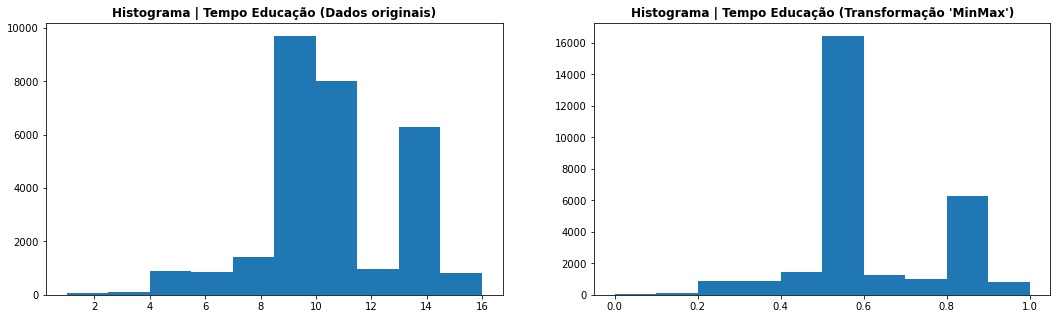

In [431]:
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.title("Histograma | Tempo Educação (Dados originais)", fontsize = 12, fontweight = 'bold')
plt.hist(df.tempo_educacao)
plt.subplot(1,2,2)
plt.title("Histograma | Tempo Educação (Transformação 'MinMax')", fontsize = 12, fontweight = 'bold')
plt.hist(t_educacao_transf)
plt.show()

In [432]:
# transformação "StandardScaler" na variável 'horas_por_semana'
h_semana = df.horas_por_semana.values.reshape(-1,1)
ss_scaler.fit(h_semana)
h_semana_transf = ss_scaler.transform(h_semana)

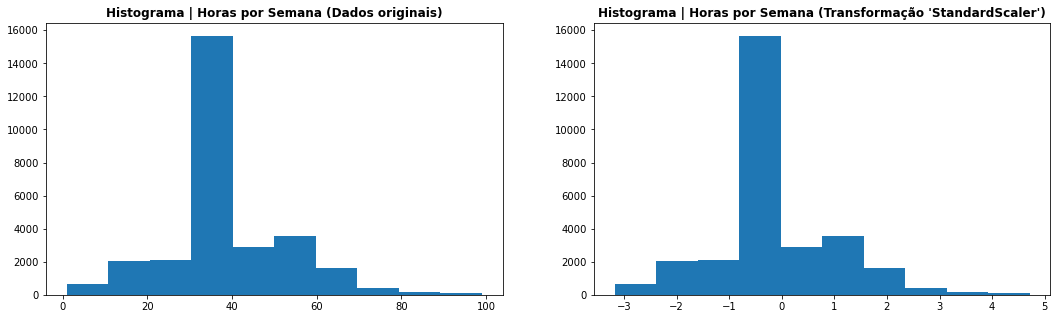

In [433]:
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.title("Histograma | Horas por Semana (Dados originais)", fontsize = 12, fontweight = 'bold')
plt.hist(df.horas_por_semana)
plt.subplot(1,2,2)
plt.title("Histograma | Horas por Semana (Transformação 'StandardScaler')", fontsize = 12, fontweight = 'bold')
plt.hist(h_semana_transf)
plt.show()

----

8 - Aplique ohe-hot-encoding nas variáveis 'estado_civil', 'cor' e 'sexo'.

In [434]:
from sklearn.preprocessing import OneHotEncoder
ohe_es = OneHotEncoder()

# ohe-hot-encoding na variável 'estado_civil'
var_ohe_ec = df.estado_civil.values.reshape(-1,1)
ohe_es.fit(var_ohe_ec)

OneHotEncoder()

In [435]:
ohe_es.transform(var_ohe_ec)
ohe_es.transform(var_ohe_ec).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [436]:
ohe_es.categories_

[array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object)]

In [437]:
dataframe_OHE_ES = pd.DataFrame(ohe_es.transform(var_ohe_ec).toarray(), 
                             columns = ohe_es.categories_[0].tolist())
dataframe_OHE_ES

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
29165,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [438]:
#agrupando no dataset - para comparar os resultados

df = pd.concat([df, dataframe_OHE_ES], axis = 1)
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [439]:
# ohe-hot-encoding na variável 'cor'
ohe_cor = OneHotEncoder()
var_ohe_cor = df.cor.values.reshape(-1,1)
ohe_cor.fit(var_ohe_cor)

OneHotEncoder()

In [440]:
ohe_cor.transform(var_ohe_cor)
ohe_cor.transform(var_ohe_cor).toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [441]:
ohe_cor.categories_

[array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object)]

In [442]:
dataframe_OHE_COR = pd.DataFrame(ohe_cor.transform(var_ohe_cor).toarray(), 
                             columns = ohe_cor.categories_[0].tolist())
dataframe_OHE_COR

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
29165,0.0,0.0,0.0,0.0,1.0
29166,0.0,0.0,0.0,0.0,1.0
29167,0.0,0.0,0.0,0.0,1.0
29168,0.0,0.0,0.0,0.0,1.0


In [443]:
df = pd.concat([df, dataframe_OHE_COR], axis = 1)
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [444]:
# ohe-hot-encoding na variável 'sexo'
ohe_sex = OneHotEncoder()
var_ohe_sex = df.sexo.values.reshape(-1,1)
ohe_sex.fit(var_ohe_sex)

OneHotEncoder()

In [445]:
ohe_sex.transform(var_ohe_sex)
ohe_sex.transform(var_ohe_sex).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [446]:
ohe_sex.categories_

[array(['Female', 'Male'], dtype=object)]

In [447]:
dataframe_OHE_SEX = pd.DataFrame(ohe_sex.transform(var_ohe_sex).toarray(), 
                             columns = ohe_sex.categories_[0].tolist())
dataframe_OHE_SEX

,Female,Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
29165,1.0,0.0
29166,0.0,1.0
29167,1.0,0.0
29168,0.0,1.0


In [448]:
df = pd.concat([df, dataframe_OHE_SEX], axis = 1)
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,Never-married,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


----

9 - Detecte e elimine os outliers da variável 'idade'.

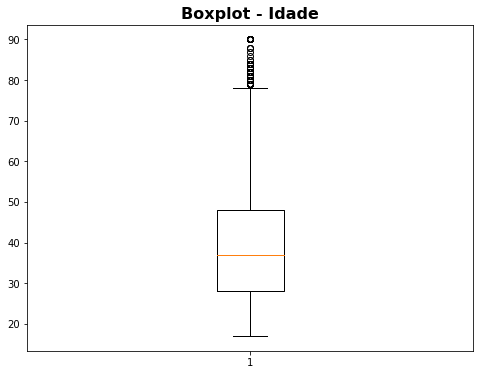

In [449]:
# gráfico boxplot para identificação de outliers de forma visual
plt.figure(figsize=[8,6])
plt.title("Boxplot - Idade", fontsize = 16, fontweight = 'bold')
plt.boxplot(df.idade)
plt.show()

In [450]:
# A partir do boxplot acima, vemos que a variável possui valores discrepantes, acima do limite superior do boxplot.
# Vamos calcular os limites inferiores e superiores do boxplot.
# primeiramente, calculamos o intervalo interquartil

iqr = np.percentile(df.idade, 75) - np.percentile(df.idade, 25)
iqr

20.0

In [451]:
# calculamos o limite inferior
limite_inf = np.maximum(np.percentile(df.idade, 25) - 1.5 * iqr, np.min(df.idade))
limite_inf

17.0

In [452]:
# calculamos o limite superior
limite_sup = np.minimum(np.percentile(df.idade, 75) + 1.5 * iqr, np.max(df.idade))
limite_sup

78.0

 > Tendo calculado os limites, podemos usar uma definição de outlier sendo os valores que estão acima do limite superior ou abaixo do limite inferior.

In [453]:
# função que captura esses valores discrepantes, a partir das informações acima
def detecta_outlier(x, limite = 1.5):
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    limite_inf = np.maximum(np.percentile(x, 25) - limite * iqr, np.min(x))
    limite_sup = np.minimum(np.percentile(x, 75) + limite * iqr, np.max(x))
    return np.where((x < limite_inf) | (x > limite_sup), 1, 0)

In [454]:
df['outlier_idade'] = detecta_outlier(df.idade)

In [455]:
df

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,outlier_idade
0,39.0,13,Never-married,White,Male,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,38.0,9,Divorced,White,Male,40,<=50K,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29165,27.0,12,Married-civ-spouse,White,Female,38,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29166,40.0,9,Married-civ-spouse,White,Male,40,>50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
29167,58.0,9,Widowed,White,Female,40,<=50K,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
29168,22.0,9,Never-married,White,Male,20,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0


In [456]:
#filtrando os outliers - definidos pela função acima
df.loc[(df.outlier_idade == 1)]

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,Divorced,Married-AF-spouse,Married-civ-spouse,...,Separated,Widowed,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male,outlier_idade
61,79.0,10,Married-civ-spouse,White,Male,20,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
193,90.0,9,Never-married,Black,Male,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
380,80.0,9,Widowed,White,Male,24,<=50K,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
826,81.0,9,Married-civ-spouse,White,Male,30,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
936,90.0,9,Never-married,White,Female,40,<=50K,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28517,80.0,12,Married-civ-spouse,White,Male,4,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
28535,82.0,9,Married-civ-spouse,White,Male,20,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
28920,90.0,9,Widowed,White,Female,25,<=50K,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
28996,90.0,4,Married-civ-spouse,White,Male,40,<=50K,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1


In [457]:
df.outlier_idade.value_counts()

0    29044
1      126
Name: outlier_idade, dtype: int64

----

10 - Escreva uma função que receba o dataframe em sua forma original e retorne o dataframe modificado, após todas as transformações dos itens acima.

In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [459]:
df = pd.read_csv("dataframe_exercicio_modulo_7.csv")
df.head()

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,nome,dívida
0,39.0,13,Never-married,White,Male,40,<=50K,NaN,NaN
1,50.0,13,Married-civ-spouse,White,Male,13,<=50K,NaN,NaN
2,38.0,9,Divorced,White,Male,40,<=50K,NaN,NaN
3,53.0,7,Married-civ-spouse,Black,Male,40,<=50K,NaN,NaN
4,37.0,14,Married-civ-spouse,White,Female,40,<=50K,NaN,NaN


In [460]:
moda_variavel_sexo = df.sexo.value_counts().idxmax()
df.loc[df.sexo=='?','sexo'] = moda_variavel_sexo
sorted(df.sexo.unique())

['Female', 'Male']

Função que trata os dados faltantes das variáveis com a seguinte lógica:
- Alterar os campos preenchidos com '?' da variável sexo, com a moda
- Se a variável tiver mais do que 80% dos dados faltantes, iremos deletar a coluna;
- Se a variável for numérica, iremos preencher com a média;
- Se a variável for categórica, iremos preencher com a moda.

In [461]:
def preprocessamento(df, cols_numericas, cols_categoricas, cols_mm_scaler, cols_ss_scaler, cols_ohe):
    dff = df.copy()
    temp = (df.isnull().sum() / df.shape[0]) >= 0.8
    variaveis_80percFaltantes = temp.loc[temp == True].index.tolist()
    for v in variaveis_80percFaltantes:
        dff = dff.drop(v, axis = 1)
        
    cols_numericas = list(set(cols_numericas).intersection(set(dff.columns.tolist())))
    cols_categoricas = list(set(cols_categoricas).intersection(set(dff.columns.tolist())))
        
    for v in cols_numericas:
        dff[v] = dff[v].fillna(dff[v].mean())
        
    for v in cols_categoricas:
        mode_v = dff[v].value_counts().idxmax()
        dff[v] = dff[v].fillna(mode_v)
    
    
    var_mm_scaler = dff[cols_mm_scaler].values.reshape(-1,1)
    mm_scaler.fit(var_mm_scaler)
    dff['var_mm_scaler_transf'] = mm_scaler.transform(var_mm_scaler)

    var_ss_scaler = dff[cols_ss_scaler].values.reshape(-1,1)
    ss_scaler.fit(var_ss_scaler)
    dff['var_ss_scaler_transf'] = ss_scaler.transform(var_ss_scaler)

    
    ohe = OneHotEncoder()
    var_ohe = df[cols_ohe].values.reshape(-1,1)
    ohe.fit(var_ohe)
    ohe.transform(var_ohe)
    ohe.transform(var_ohe).toarray()
    dataframe_OHE = pd.DataFrame(ohe.transform(var_ohe).toarray(), columns = ohe.categories_[0].tolist())
    dff = pd.concat([dff, dataframe_OHE], axis = 1)
    
    
    return dff

Aplicando a função

In [462]:
df_limpo = preprocessamento(df = df, 
                            cols_numericas = ['idade', 'tempo_educacao', 'horas_por_semana', 'nome', 'dívida'], 
                            cols_categoricas = ['estado_civil', 'cor', 'sexo', 'salario_anual'],
                            cols_mm_scaler = ['tempo_educacao'],
                            cols_ss_scaler = ['horas_por_semana'],
                            cols_ohe = ['estado_civil', 'cor', 'sexo'])
df_limpo

,idade,tempo_educacao,estado_civil,cor,sexo,horas_por_semana,salario_anual,var_mm_scaler_transf,var_ss_scaler_transf,Amer-Indian-Eskimo,...,Female,Male,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Other,Separated,White,Widowed
0,39.0,13.0,Never-married,White,Male,40.0,<=50K,0.800000,-0.03606,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,50.0,13.0,Married-civ-spouse,White,Male,13.0,<=50K,0.800000,-2.21050,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,38.0,9.0,Divorced,White,Male,40.0,<=50K,0.533333,-0.03606,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53.0,7.0,Married-civ-spouse,Black,Male,40.0,<=50K,0.400000,-0.03606,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37.0,14.0,Married-civ-spouse,White,Female,40.0,<=50K,0.866667,-0.03606,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
87506,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
87508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Verificando os dados

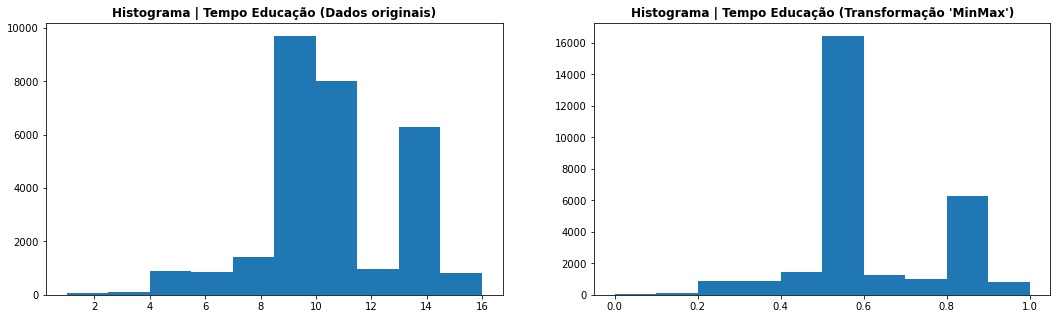

In [463]:
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.title("Histograma | Tempo Educação (Dados originais)", fontsize = 12, fontweight = 'bold')
plt.hist(df_limpo.tempo_educacao)
plt.subplot(1,2,2)
plt.title("Histograma | Tempo Educação (Transformação 'MinMax')", fontsize = 12, fontweight = 'bold')
plt.hist(df_limpo.var_mm_scaler_transf)
plt.show()

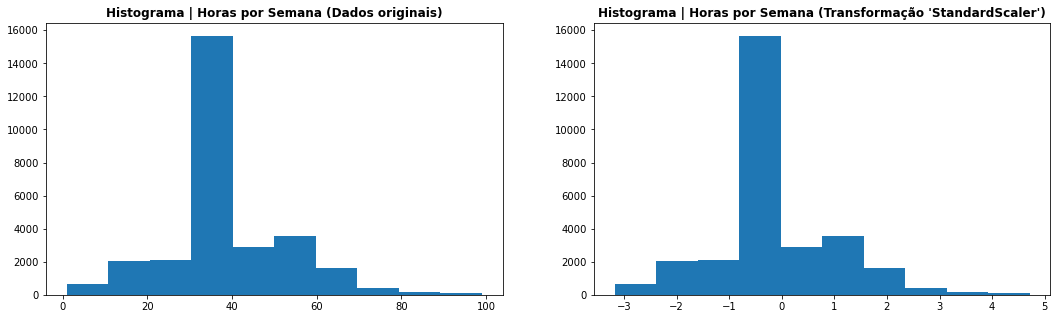

In [464]:
plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.title("Histograma | Horas por Semana (Dados originais)", fontsize = 12, fontweight = 'bold')
plt.hist(df_limpo.horas_por_semana)
plt.subplot(1,2,2)
plt.title("Histograma | Horas por Semana (Transformação 'StandardScaler')", fontsize = 12, fontweight = 'bold')
plt.hist(df_limpo.var_ss_scaler_transf)
plt.show()